In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
crime = pd.read_csv('crime_data.csv')

In [3]:
crime.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
Unnamed: 0    50 non-null object
Murder        50 non-null float64
Assault       50 non-null int64
UrbanPop      50 non-null int64
Rape          50 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.rename(columns={'Unnamed: 0':'States'},inplace= True)

In [6]:
crime.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [7]:
crime.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [8]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
States      50 non-null object
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
crime.States.describe()

count            50
unique           50
top       Tennessee
freq              1
Name: States, dtype: object

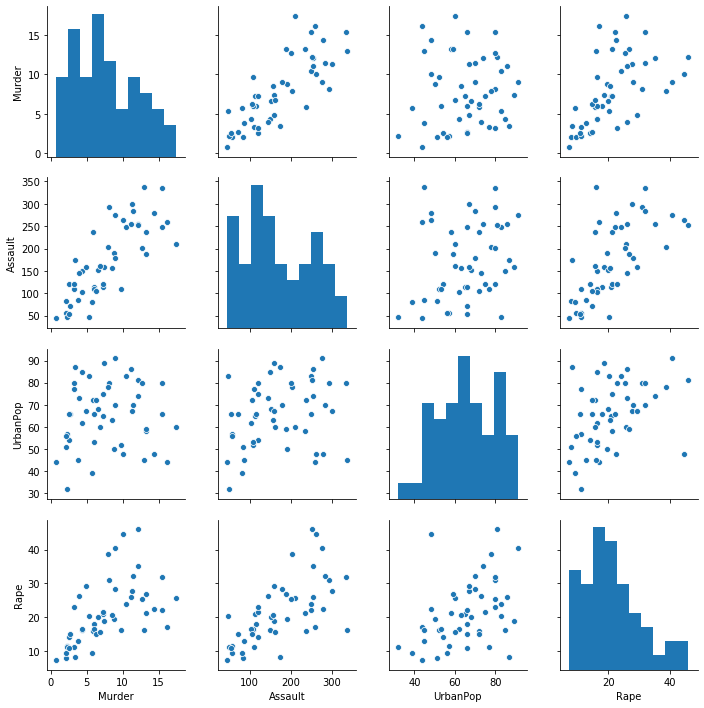

In [10]:
sns.pairplot(data=crime)

plt.show()

In [11]:
corr = crime.corr()

In [12]:
corr

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


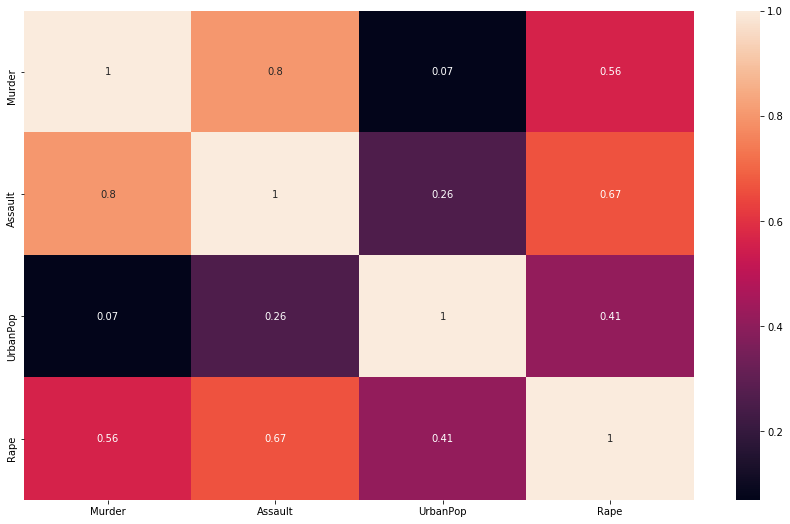

In [13]:
plt.figure(figsize=(15,9))

ax = sns.heatmap(corr,  annot=True)

plt.show()

In [14]:
# from correlation matrix we can chose the features pair (mostly>=60)

In [15]:
from sklearn.cluster import KMeans

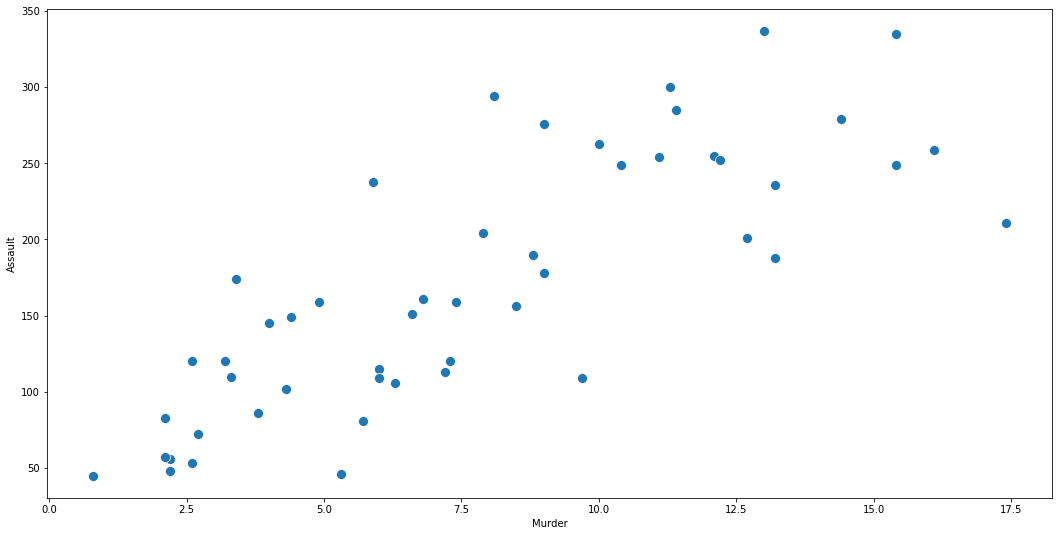

In [16]:
plt.figure(figsize=(18,9))

sns.scatterplot('Murder','Assault',data=crime,s=100)

plt.show()

In [17]:
def ElbowMethod(data):
    wcss = list()
    for x in range(1,11):
        kmean = KMeans(x)
        y = kmean.fit(data)
        wcss.append(y.inertia_)
        
    return wcss

In [18]:
X = crime.iloc[:,[1,2]].values

elbow = ElbowMethod(X)

In [19]:
elbow

[341242.6728,
 83705.35211822661,
 36346.08128571429,
 23960.783285714282,
 13664.661619047618,
 8447.280666666667,
 5381.600484848485,
 3191.486277777777,
 2369.3234206349202,
 1883.5392142857145]

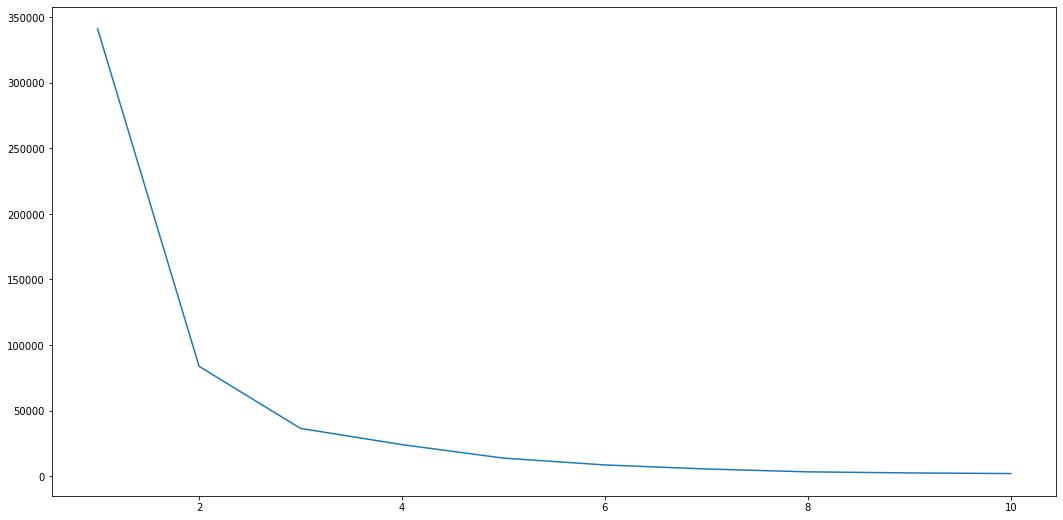

In [20]:
plt.figure(figsize=(18,9))

sns.lineplot(range(1,11),elbow)

plt.show()

In [21]:
# so, for Murder and Assault we can have 3 cluster

In [22]:
kmeans = KMeans(3)
yPred = kmeans.fit_predict(X)

yPred

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0], dtype=int32)

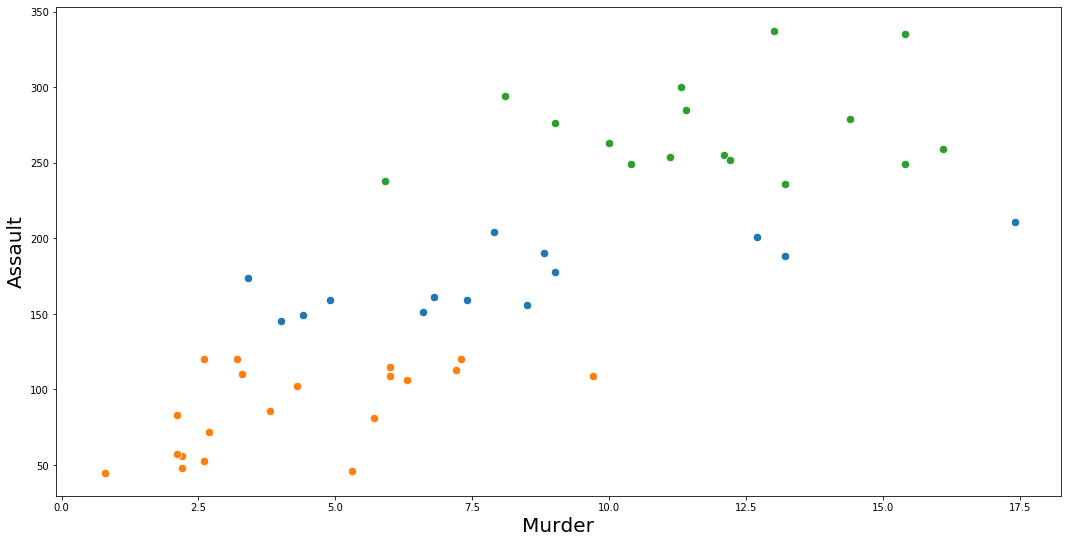

In [23]:
# plot scatter plot for the Murder and Assault

plt.figure(figsize=(18,9))

sns.scatterplot(X[yPred == 0,0],X[yPred==0,1],s=70)
sns.scatterplot(X[yPred == 1,0],X[yPred==1,1],s=70)
sns.scatterplot(X[yPred == 2,0],X[yPred==2,1],s=70)
#sns.scatterplot(X[yPred == 3,0],X[yPred==3,1],s=70)
#sns.scatterplot(X[yPred == 4,0],X[yPred==4,1],s=70)


plt.xlabel('Murder',fontsize=20)
plt.ylabel('Assault',fontsize=20)
plt.show()

In [24]:
# this conclude that city with greater murder rate also have greater Assault rate
# we can also say that people who have did more murder also did Assault at big level 